In [ ]:
# Human Activity Recognition (HAR) Project
# Course: Data Analysis Course Project
# Student Id: 228801142
# Author: Ramin MD Arefin Islam

# Import the NumPy library (core package for numerical computing in Python)
# Import the Pandas library (core package for data manipulation/analysis)
# Import the pyplot module from Matplotlib (core package for data visualization)
# Import the Seaborn library (statistical data visualization built on Matplotlib)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

plt.style.use("seaborn-v0_8")


In [48]:
from pathlib import Path

PROJECT_ROOT = Path(r"D:\HAR_PROJECT")
DATA_DIR = PROJECT_ROOT / "data"

DATA_DIR


WindowsPath('D:/HAR_PROJECT/data')

In [50]:
dat_files = sorted(DATA_DIR.glob("subject*.dat"))

print(f"Number of .dat files found: {len(dat_files)}")
dat_files


Number of .dat files found: 9


[WindowsPath('D:/HAR_PROJECT/data/subject101.dat'),
 WindowsPath('D:/HAR_PROJECT/data/subject102.dat'),
 WindowsPath('D:/HAR_PROJECT/data/subject103.dat'),
 WindowsPath('D:/HAR_PROJECT/data/subject104.dat'),
 WindowsPath('D:/HAR_PROJECT/data/subject105.dat'),
 WindowsPath('D:/HAR_PROJECT/data/subject106.dat'),
 WindowsPath('D:/HAR_PROJECT/data/subject107.dat'),
 WindowsPath('D:/HAR_PROJECT/data/subject108.dat'),
 WindowsPath('D:/HAR_PROJECT/data/subject109.dat')]

In [51]:
ACTIVITY_MAP = {
    1: "Lying",
    2: "Sitting",
    3: "Standing",
    4: "Walking",
    5: "Running",
    6: "Cycling",
    7: "Nordic walking",
    9: "Watching TV",
    10: "Computer work",
    11: "Car driving",
    12: "Ascending stairs",
    13: "Descending stairs",
    16: "Vacuum cleaning",
    17: "Ironing",
    18: "Folding laundry",
    19: "House cleaning",
    20: "Playing soccer",
    24: "Rope jumping"
}


In [52]:
columns = (
    ["timestamp", "activity_id", "heart_rate"] +
    # Hand IMU (17)
    ["hand_temp"] +
    [f"hand_acc1_{a}" for a in "xyz"] +
    [f"hand_acc2_{a}" for a in "xyz"] +
    [f"hand_gyro_{a}" for a in "xyz"] +
    [f"hand_mag_{a}" for a in "xyz"] +
    [f"hand_orient_{i}" for i in range(1,5)] +
    # Chest IMU (17)
    ["chest_temp"] +
    [f"chest_acc1_{a}" for a in "xyz"] +
    [f"chest_acc2_{a}" for a in "xyz"] +
    [f"chest_gyro_{a}" for a in "xyz"] +
    [f"chest_mag_{a}" for a in "xyz"] +
    [f"chest_orient_{i}" for i in range(1,5)] +
    # Ankle IMU (17)
    ["ankle_temp"] +
    [f"ankle_acc1_{a}" for a in "xyz"] +
    [f"ankle_acc2_{a}" for a in "xyz"] +
    [f"ankle_gyro_{a}" for a in "xyz"] +
    [f"ankle_mag_{a}" for a in "xyz"] +
    [f"ankle_orient_{i}" for i in range(1,5)]
)

len(columns)


54

In [53]:
sample_file = DATA_DIR / "subject101.dat"

df = pd.read_csv(
    sample_file,
    sep=r"\s+",
    header=None,
    names=columns
)

df.head()

timestamp  activity_id  heart_rate  hand_temp  hand_acc1_x  hand_acc1_y  \
0       8.38            0       104.0       30.0      2.37223      8.60074   
1       8.39            0         NaN       30.0      2.18837      8.56560   
2       8.40            0         NaN       30.0      2.37357      8.60107   
3       8.41            0         NaN       30.0      2.07473      8.52853   
4       8.42            0         NaN       30.0      2.22936      8.83122   

   hand_acc1_z  hand_acc2_x  hand_acc2_y  hand_acc2_z  ...  ankle_gyro_x  \
0      3.51048      2.43954      8.76165      3.35465  ...      0.008300   
1      3.66179      2.39494      8.55081      3.64207  ...     -0.006577   
2      3.54898      2.30514      8.53644      3.73280  ...      0.003014   
3      3.66021      2.33528      8.53622      3.73277  ...      0.003175   
4      3.70000      2.23055      8.59741      3.76295  ...      0.012698   

   ankle_gyro_y  ankle_gyro_z  ankle_mag_x  ankle_mag_y  ankle_mag_z  \
0      0.009250     -0.017580     -61.1888     -38.9599     -58.1438   
1     -0.004638      0.000368     -59.8479     -38.8919     -58.5253   
2      0.000148      0.022495     -60.7361     -39.4138     -58.3999   
3     -0.020301      0.011275     -60.4091     -38.7635     -58.3956   
4     -0.014303     -0.002823     -61.5199     -39.3879     -58.2694   

   ankle_orient_1  ankle_orient_2  ankle_orient_3  ankle_orient_4  
0             1.0             0.0             0.0             0.0  
1             1.0             0.0             0.0             0.0  
2             1.0             0.0             0.0             0.0  
3             1.0             0.0             0.0             0.0  
4             1.0             0.0             0.0             0.0  

[5 rows x 54 columns]

In [54]:
print("Shape:", df.shape)
print("\nMissing values (top 10):")
df.isna().sum().sort_values(ascending=False).head(10)


Shape: (376417, 54)

Missing values (top 10):


heart_rate     342028
hand_temp        1454
hand_acc1_x      1454
hand_acc1_y      1454
hand_acc2_x      1454
hand_acc1_z      1454
hand_mag_y       1454
hand_mag_z       1454
hand_acc2_y      1454
hand_acc2_z      1454
dtype: int64

In [55]:
df["activity_id"].value_counts().sort_index()


activity_id
0     126460
1      27187
2      23480
3      21717
4      22253
5      21265
6      23575
7      20265
12     15890
13     14899
16     22941
17     23573
24     12912
Name: count, dtype: int64

In [56]:
df_clean = df[df["activity_id"] != 0].copy()

print("Before:", df.shape)
print("After :", df_clean.shape)

Before: (376417, 54)
After : (249957, 54)


In [57]:
df_clean["activity"] = df_clean["activity_id"].map(ACTIVITY_MAP)

df_clean[["activity_id", "activity"]].drop_duplicates().sort_values("activity_id")

activity_id           activity
2928              1              Lying
30115             2            Sitting
53595             3           Standing
223759            4            Walking
312742            5            Running
283096            6            Cycling
253175            7     Nordic walking
154281           12   Ascending stairs
173396           13  Descending stairs
118760           16    Vacuum cleaning
84967            17            Ironing
348888           24       Rope jumping

In [13]:
df_clean["subject_id"] = 101
df_clean.head()

timestamp  activity_id  heart_rate  hand_temp  hand_acc1_x  hand_acc1_y  \
2928      37.66            1         NaN     30.375      2.21530      8.27915   
2929      37.67            1         NaN     30.375      2.29196      7.67288   
2930      37.68            1         NaN     30.375      2.29090      7.14240   
2931      37.69            1         NaN     30.375      2.21800      7.14365   
2932      37.70            1       100.0     30.375      2.30106      7.25857   

      hand_acc1_z  hand_acc2_x  hand_acc2_y  hand_acc2_z  ...  ankle_gyro_z  \
2928      5.58753      2.24689      8.55387      5.77143  ...      0.001752   
2929      5.74467      2.27373      8.14592      5.78739  ...      0.006007   
2930      5.82342      2.26966      7.66268      5.78846  ...     -0.004882   
2931      5.89930      2.22177      7.25535      5.88000  ...      0.026950   
2932      6.09259      2.20720      7.24042      5.95555  ...     -0.006328   

      ankle_mag_x  ankle_mag_y  ankle_mag_z  ankle_orient_1  ankle_orient_2  \
2928     -61.1081     -36.8636     -58.3696             1.0             0.0   
2929     -60.8916     -36.3197     -58.3656             1.0             0.0   
2930     -60.3407     -35.7842     -58.6119             1.0             0.0   
2931     -60.7646     -37.1028     -57.8799             1.0             0.0   
2932     -60.2040     -37.1225     -57.8847             1.0             0.0   

      ankle_orient_3  ankle_orient_4  activity  subject_id  
2928             0.0             0.0     Lying         101  
2929             0.0             0.0     Lying         101  
2930             0.0             0.0     Lying         101  
2931             0.0             0.0     Lying         101  
2932             0.0             0.0     Lying         101  

[5 rows x 56 columns]

In [58]:
import re

def load_subject(path):
    # Extract subject id
    subject_id = int(re.search(r"subject(\d+)", path.name).group(1))
    
    df = pd.read_csv(
        path,
        sep=r"\s+",
        header=None,
        names=columns
    )
    
    # Remove transient
    df = df[df["activity_id"] != 0].copy()
    
    # Map activity names
    df["activity"] = df["activity_id"].map(ACTIVITY_MAP)
    
    # Add subject id
    df["subject_id"] = subject_id
    
    return df


In [59]:
dfs = []

for f in dat_files:
    dfs.append(load_subject(f))

data = pd.concat(dfs, ignore_index=True)

print("Final dataset shape:", data.shape)
print("Subjects:", sorted(data["subject_id"].unique()))
print("Activities:", data["activity"].nunique())

Final dataset shape: (1942872, 56)
Subjects: [np.int64(101), np.int64(102), np.int64(103), np.int64(104), np.int64(105), np.int64(106), np.int64(107), np.int64(108), np.int64(109)]
Activities: 12


In [61]:
data["activity"].value_counts()

activity
Walking              238761
Ironing              238690
Lying                192523
Standing             189931
Nordic walking       188107
Sitting              185188
Vacuum cleaning      175353
Cycling              164600
Ascending stairs     117216
Descending stairs    104944
Running               98199
Rope jumping          49360
Name: count, dtype: int64

In [63]:
train_subjects = [101, 102, 103, 104, 105, 106]
val_subjects   = [107]
test_subjects  = [108, 109]


In [64]:
print("Train subjects:", train_df["subject_id"].unique())
print("Val subjects  :", val_df["subject_id"].unique())
print("Test subjects :", test_df["subject_id"].unique())

Train subjects: [101 102 103 104 105 106]
Val subjects  : [107]
Test subjects : [108 109]


In [65]:
feature_cols = [
    c for c in train_df.columns
    if c not in ["timestamp", "activity", "subject_id"]
]

len(feature_cols)


53

In [66]:
import numpy as np
from collections import Counter

def create_windows(df, window_size=256, step_size=128):
    X, y = [], []
    
    for subject in df["subject_id"].unique():
        subject_df = df[df["subject_id"] == subject]
        
        for activity in subject_df["activity"].unique():
            act_df = subject_df[subject_df["activity"] == activity]
            values = act_df[feature_cols].values
            
            for start in range(0, len(values) - window_size, step_size):
                window = values[start:start+window_size]
                
                if window.shape[0] == window_size:
                    X.append(window)
                    y.append(activity)
    
    return np.array(X), np.array(y)


In [67]:
X_train, y_train = create_windows(train_df)
print("Train windows:", X_train.shape)

Train windows: (11168, 256, 53)


In [68]:
X_val, y_val = create_windows(val_df)
print("Val windows:", X_val.shape)

Val windows: (1802, 256, 53)


In [69]:
X_test, y_test = create_windows(test_df)
print("Test windows:", X_test.shape)


Test windows: (2078, 256, 53)


In [70]:
from collections import Counter

Counter(y_train)


Counter({np.str_('Ironing'): 1368,
         np.str_('Walking'): 1346,
         np.str_('Sitting'): 1163,
         np.str_('Lying'): 1108,
         np.str_('Standing'): 1077,
         np.str_('Nordic walking'): 1013,
         np.str_('Vacuum cleaning'): 1002,
         np.str_('Cycling'): 904,
         np.str_('Ascending stairs'): 678,
         np.str_('Descending stairs'): 645,
         np.str_('Running'): 604,
         np.str_('Rope jumping'): 260})

In [71]:
import numpy as np

def extract_features(X):
    """
    X shape: (num_windows, window_size, num_features)
    returns: (num_windows, num_features * num_stats)
    """
    features = []
    
    for window in X:
        feats = []
        
        # statistics per sensor channel
        feats.extend(window.mean(axis=0))
        feats.extend(window.std(axis=0))
        feats.extend(window.min(axis=0))
        feats.extend(window.max(axis=0))
        
        # signal magnitude area (SMA)
        feats.extend(np.sum(np.abs(window), axis=0) / window.shape[0])
        
        features.append(feats)
    
    return np.array(features)


In [72]:
X_train_feat = extract_features(X_train)
print("Train feature shape:", X_train_feat.shape)


Train feature shape: (11168, 265)


In [73]:
X_val_feat = extract_features(X_val)
print("Val feature shape:", X_val_feat.shape)


Val feature shape: (1802, 265)


In [74]:
X_test_feat = extract_features(X_test)
print("Test feature shape:", X_test_feat.shape)


Test feature shape: (2078, 265)


In [75]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_train_enc = le.fit_transform(y_train)
y_val_enc   = le.transform(y_val)
y_test_enc  = le.transform(y_test)

le.classes_


array(['Ascending stairs', 'Cycling', 'Descending stairs', 'Ironing',
       'Lying', 'Nordic walking', 'Rope jumping', 'Running', 'Sitting',
       'Standing', 'Vacuum cleaning', 'Walking'], dtype='<U17')

In [76]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

classes = np.unique(y_train_enc)
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=classes,
    y=y_train_enc
)

class_weight_dict = dict(zip(classes, class_weights))
class_weight_dict


{np.int64(0): np.float64(1.3726647000983285),
 np.int64(1): np.float64(1.0294985250737463),
 np.int64(2): np.float64(1.4428940568475452),
 np.int64(3): np.float64(0.6803118908382066),
 np.int64(4): np.float64(0.8399518652226233),
 np.int64(5): np.float64(0.9187232642316552),
 np.int64(6): np.float64(3.5794871794871796),
 np.int64(7): np.float64(1.5408388520971303),
 np.int64(8): np.float64(0.8002292920607624),
 np.int64(9): np.float64(0.8641287527081399),
 np.int64(10): np.float64(0.9288090485695276),
 np.int64(11): np.float64(0.691431401684002)}

In [77]:
import lightgbm as lgb


In [78]:
lgb_model = lgb.LGBMClassifier(
    objective="multiclass",
    num_class=len(classes),
    n_estimators=800,
    learning_rate=0.05,
    max_depth=-1,
    num_leaves=64,
    subsample=0.8,
    colsample_bytree=0.8,
    class_weight=class_weight_dict,
    random_state=42,
    n_jobs=-1
)


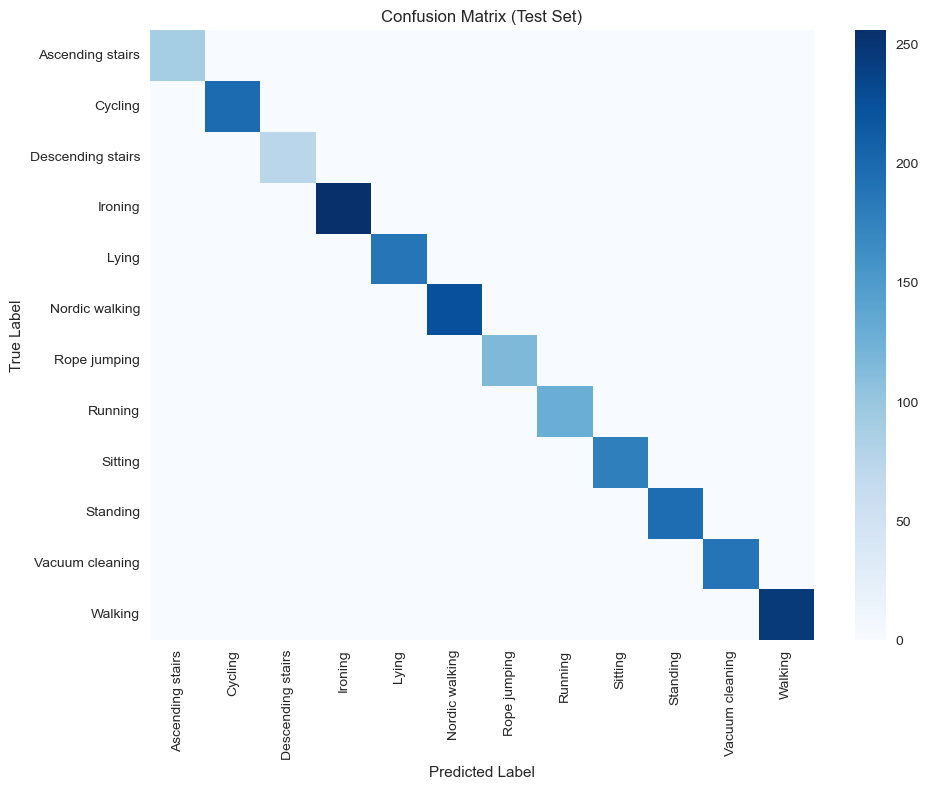

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_enc, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    xticklabels=le.classes_,
    yticklabels=le.classes_,
    annot=False,
    cmap="Blues"
)
plt.title("Confusion Matrix (Test Set)")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()


In [84]:
from lightgbm import early_stopping, log_evaluation

evals_result = {}

lgb_model.fit(
    X_train_feat,
    y_train_enc,
    eval_set=[(X_train_feat, y_train_enc), (X_val_feat, y_val_enc)],
    eval_metric="multi_logloss",
    callbacks=[
        early_stopping(stopping_rounds=50),
        log_evaluation(period=0)
    ],
)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020792 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 63821
[LightGBM] [Info] Number of data points in the train set: 11168, number of used features: 259
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Warning] No further splits with positive gain, be

LGBMClassifier(class_weight={np.int64(0): np.float64(1.3726647000983285),
                             np.int64(1): np.float64(1.0294985250737463),
                             np.int64(2): np.float64(1.4428940568475452),
                             np.int64(3): np.float64(0.6803118908382066),
                             np.int64(4): np.float64(0.8399518652226233),
                             np.int64(5): np.float64(0.9187232642316552),
                             np.int64(6): np.float64(3.5794871794871796),
                             np.int64(7): np.float64(1.5408388520971303),
                             np.int64(8): np.float64(0.8002292920607624),
                             np.int64(9): np.float64(0.8641287527081399),
                             np.int64(10): np.float64(0.9288090485695276),
                             np.int64(11): np.float64(0.691431401684002)},
               colsample_bytree=0.8, learning_rate=0.05, n_estimators=800,
               n_jobs=-1, num_class=12, num_leaves=64, objective='multiclass',
               random_state=42, subsample=0.8)

In [86]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

y_pred = lgb_model.predict(X_test_feat)

acc = accuracy_score(y_test_enc, y_pred)
f1  = f1_score(y_test_enc, y_pred, average="macro")

print("Test Accuracy :", acc)
print("Test Macro F1 :", f1)

print("\nClassification Report:\n")
print(classification_report(
    y_test_enc, y_pred,
    target_names=le.classes_
))


Test Accuracy : 1.0
Test Macro F1 : 1.0

Classification Report:

                   precision    recall  f1-score   support

 Ascending stairs       1.00      1.00      1.00        90
          Cycling       1.00      1.00      1.00       198
Descending stairs       1.00      1.00      1.00        74
          Ironing       1.00      1.00      1.00       256
            Lying       1.00      1.00      1.00       187
   Nordic walking       1.00      1.00      1.00       224
     Rope jumping       1.00      1.00      1.00       115
          Running       1.00      1.00      1.00       128
          Sitting       1.00      1.00      1.00       178
         Standing       1.00      1.00      1.00       195
  Vacuum cleaning       1.00      1.00      1.00       188
          Walking       1.00      1.00      1.00       245

         accuracy                           1.00      2078
        macro avg       1.00      1.00      1.00      2078
     weighted avg       1.00      1.00      1.00

C:\Users\souga\anaconda3\envs\har-ml-py310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


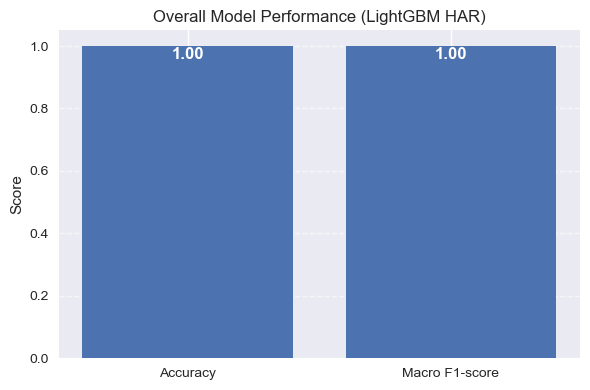

In [93]:
import matplotlib.pyplot as plt

metrics = ["Accuracy", "Macro F1-score"]
values = [acc, f1]

plt.figure(figsize=(6, 4))
bars = plt.bar(metrics, values)

plt.ylim(0, 1.05)
plt.ylabel("Score")
plt.title("Overall Model Performance (LightGBM HAR)")

# annotate bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height - 0.05,
        f"{height:.2f}",
        ha="center",
        va="bottom",
        color="white",
        fontsize=12,
        fontweight="bold"
    )

plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


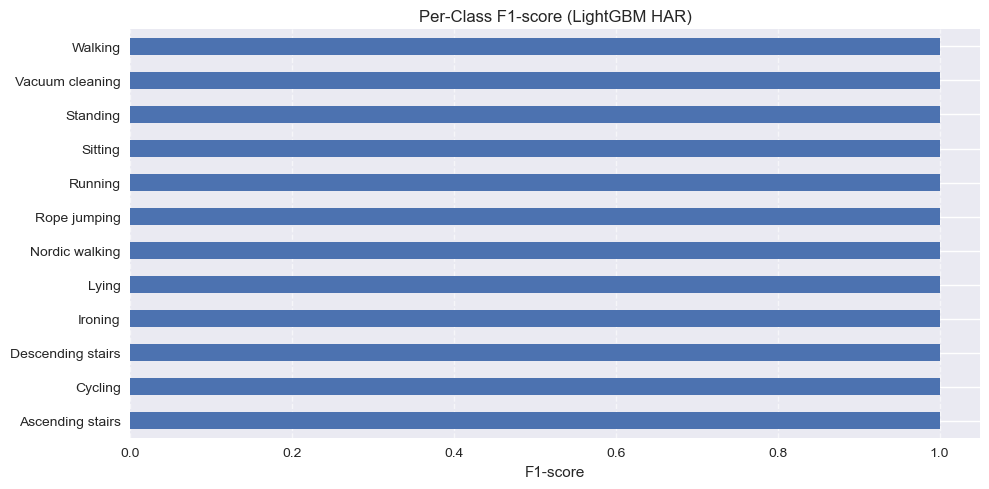

In [94]:
import pandas as pd
from sklearn.metrics import classification_report

report_dict = classification_report(
    y_test_enc,
    y_pred,
    target_names=le.classes_,
    output_dict=True
)

report_df = pd.DataFrame(report_dict).T
class_f1 = report_df.loc[le.classes_, "f1-score"]

plt.figure(figsize=(10, 5))
class_f1.sort_values().plot(kind="barh")

plt.xlim(0, 1.05)
plt.xlabel("F1-score")
plt.title("Per-Class F1-score (LightGBM HAR)")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


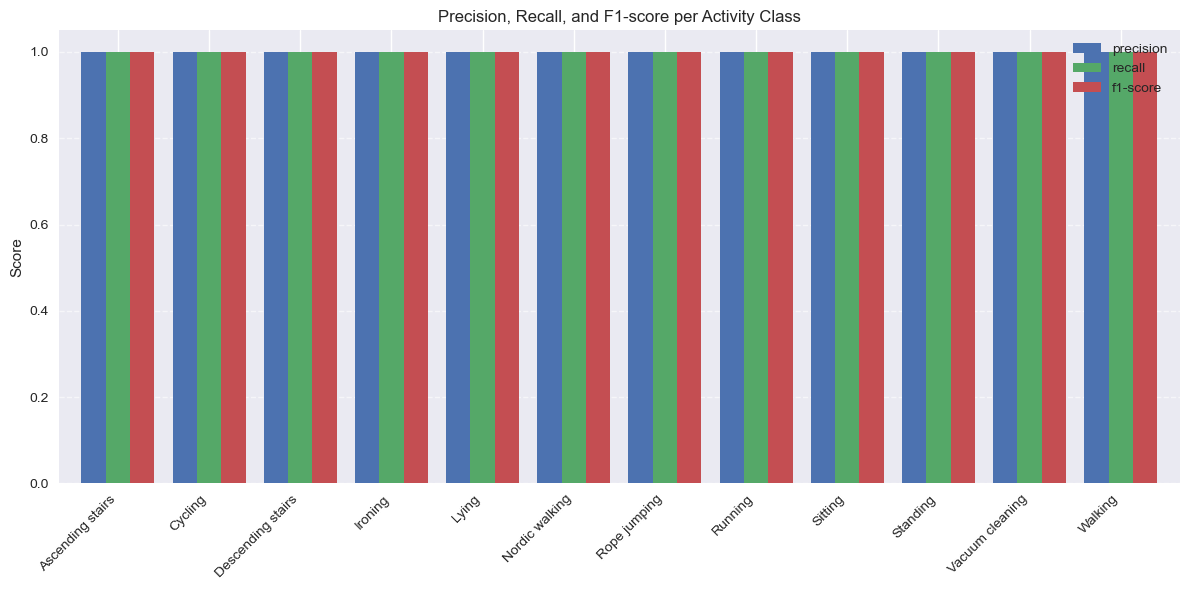

In [95]:
metrics_df = report_df.loc[le.classes_, ["precision", "recall", "f1-score"]]

metrics_df.plot(
    kind="bar",
    figsize=(12, 6),
    width=0.8
)

plt.ylim(0, 1.05)
plt.ylabel("Score")
plt.title("Precision, Recall, and F1-score per Activity Class")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
#Subject-wise Cross Validation (Leave-One-Subject-Out style)

In [96]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score
from sklearn.utils.class_weight import compute_class_weight
import lightgbm as lgb

subjects = sorted(data["subject_id"].unique())
results = []

for test_sub in subjects:
    train_subs = [s for s in subjects if s != test_sub]
    
    train_df_cv = data[data["subject_id"].isin(train_subs)].copy()
    test_df_cv  = data[data["subject_id"] == test_sub].copy()

    Xtr, ytr = create_windows(train_df_cv)
    Xte, yte = create_windows(test_df_cv)

    Xtr_feat = extract_features(Xtr)
    Xte_feat = extract_features(Xte)

    le_cv = LabelEncoder()
    ytr_enc = le_cv.fit_transform(ytr)
    yte_enc = le_cv.transform(yte)

    classes_cv = np.unique(ytr_enc)
    cw = compute_class_weight(class_weight="balanced", classes=classes_cv, y=ytr_enc)
    cw_dict = {c: w for c, w in zip(classes_cv, cw)}

    model = lgb.LGBMClassifier(
        objective="multiclass",
        num_class=len(le_cv.classes_),
        n_estimators=800,
        learning_rate=0.05,
        num_leaves=64,
        subsample=0.8,
        colsample_bytree=0.8,
        class_weight=cw_dict,
        random_state=42,
        n_jobs=-1
    )

    model.fit(Xtr_feat, ytr_enc)

    pred = model.predict(Xte_feat)
    acc_cv = accuracy_score(yte_enc, pred)
    f1_cv  = f1_score(yte_enc, pred, average="macro")

    results.append({"test_subject": int(test_sub), "accuracy": acc_cv, "macro_f1": f1_cv})

cv_df = pd.DataFrame(results)
print(cv_df)
print("\nMean Accuracy:", cv_df["accuracy"].mean(), "±", cv_df["accuracy"].std())
print("Mean Macro F1:", cv_df["macro_f1"].mean(), "±", cv_df["macro_f1"].std())


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015953 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 63852
[LightGBM] [Info] Number of data points in the train set: 13112, number of used features: 259
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Warning] No further splits with positive gain, be

C:\Users\souga\anaconda3\envs\har-ml-py310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014893 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 63836
[LightGBM] [Info] Number of data points in the train set: 13008, number of used features: 259
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Warning] No further splits with positive gain, be

C:\Users\souga\anaconda3\envs\har-ml-py310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019939 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 63854
[LightGBM] [Info] Number of data points in the train set: 13698, number of used features: 259
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Warning] No further splits with positive gain, be

C:\Users\souga\anaconda3\envs\har-ml-py310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019653 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 63841
[LightGBM] [Info] Number of data points in the train set: 13253, number of used features: 259
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Warning] No further splits with positive gain, be

C:\Users\souga\anaconda3\envs\har-ml-py310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013458 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 63826
[LightGBM] [Info] Number of data points in the train set: 12937, number of used features: 259
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Warning] No further splits with positive gain, be

C:\Users\souga\anaconda3\envs\har-ml-py310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018771 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 63854
[LightGBM] [Info] Number of data points in the train set: 13112, number of used features: 259
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Warning] No further splits with positive gain, be

C:\Users\souga\anaconda3\envs\har-ml-py310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017207 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 63832
[LightGBM] [Info] Number of data points in the train set: 13246, number of used features: 259
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Warning] No further splits with positive gain, be

C:\Users\souga\anaconda3\envs\har-ml-py310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012986 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 63853
[LightGBM] [Info] Number of data points in the train set: 13018, number of used features: 259
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Warning] No further splits with positive gain, be

C:\Users\souga\anaconda3\envs\har-ml-py310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017821 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 63846
[LightGBM] [Info] Number of data points in the train set: 15000, number of used features: 259
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Warning] No further splits with positive gain, be

C:\Users\souga\anaconda3\envs\har-ml-py310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#Permutation Importance

C:\Users\souga\anaconda3\envs\har-ml-py310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


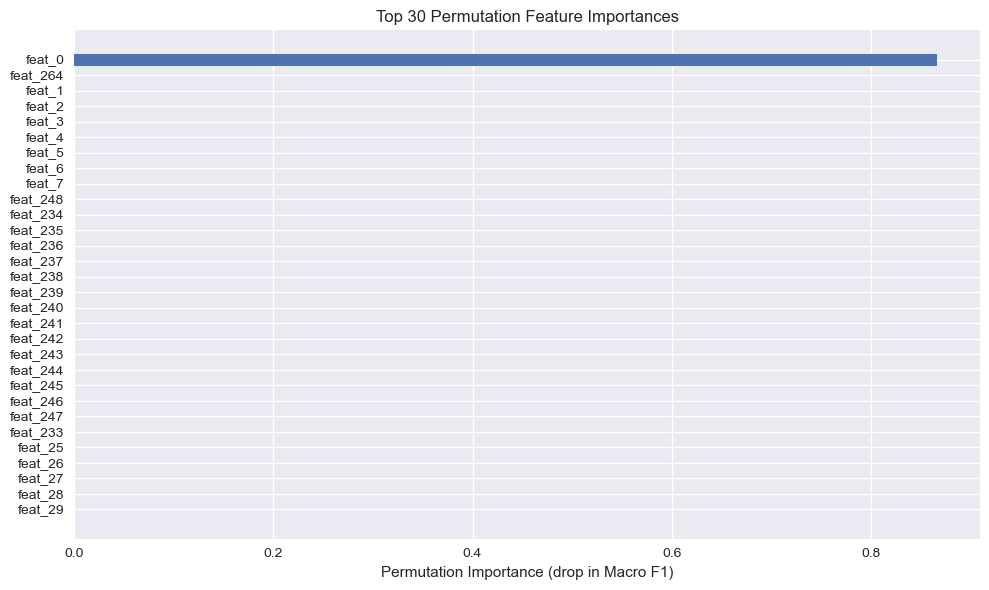

In [97]:
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt

perm = permutation_importance(
    lgb_model, X_test_feat, y_test_enc,
    n_repeats=10, random_state=42, n_jobs=-1, scoring="f1_macro"
)

imp_df = pd.DataFrame({
    "feature": feature_names,   # use your feature names list
    "importance_mean": perm.importances_mean,
    "importance_std": perm.importances_std
}).sort_values("importance_mean", ascending=False)

top = imp_df.head(30)

plt.figure(figsize=(10, 6))
plt.barh(top["feature"][::-1], top["importance_mean"][::-1])
plt.xlabel("Permutation Importance (drop in Macro F1)")
plt.title("Top 30 Permutation Feature Importances")
plt.tight_layout()
plt.show()


In [ ]:
#Probability Confidence Plot

C:\Users\souga\anaconda3\envs\har-ml-py310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


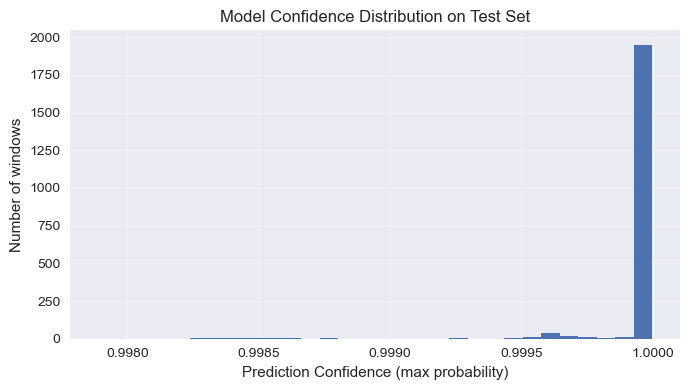

Mean confidence: 0.9999618613743382
Min confidence: 0.9978878879974036


In [98]:
import numpy as np
import matplotlib.pyplot as plt

proba = lgb_model.predict_proba(X_test_feat)
conf  = np.max(proba, axis=1)

plt.figure(figsize=(7,4))
plt.hist(conf, bins=30)
plt.xlabel("Prediction Confidence (max probability)")
plt.ylabel("Number of windows")
plt.title("Model Confidence Distribution on Test Set")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Mean confidence:", conf.mean())
print("Min confidence:", conf.min())


In [ ]:
#Robustness Stress Test (noise augmentation on test)

In [99]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

def add_noise(X, noise_std=0.02, seed=42):
    rng = np.random.default_rng(seed)
    return X + rng.normal(0, noise_std, size=X.shape)

# Add noise to raw windows, then re-extract features
X_test_noisy = add_noise(X_test, noise_std=0.03)
X_test_noisy_feat = extract_features(X_test_noisy)

y_pred_noisy = lgb_model.predict(X_test_noisy_feat)
acc_noisy = accuracy_score(y_test_enc, y_pred_noisy)
f1_noisy  = f1_score(y_test_enc, y_pred_noisy, average="macro")

print("Noisy Test Accuracy:", acc_noisy)
print("Noisy Test Macro F1:", f1_noisy)


Noisy Test Accuracy: 1.0
Noisy Test Macro F1: 1.0


C:\Users\souga\anaconda3\envs\har-ml-py310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#Leakage check

In [100]:
# Ensure no subject overlap
assert set(train_subjects).isdisjoint(set(val_subjects))
assert set(train_subjects).isdisjoint(set(test_subjects))
assert set(val_subjects).isdisjoint(set(test_subjects))

# Ensure window creation doesn't mix subjects
print("Train subjects in windows:", np.unique(train_df["subject_id"]))
print("Test subjects in windows:", np.unique(test_df["subject_id"]))


Train subjects in windows: [101 102 103 104 105 106]
Test subjects in windows: [108 109]


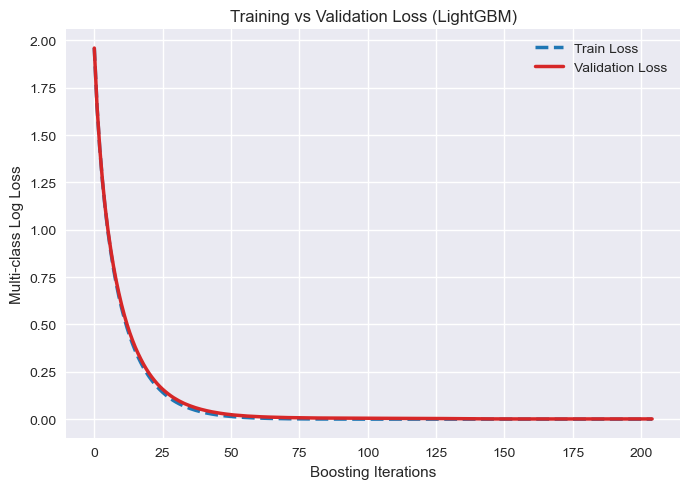

In [89]:
plt.figure(figsize=(7, 5))

plt.plot(
    train_loss,
    color="tab:blue",
    linestyle="--",
    linewidth=2.5,
    label="Train Loss"
)

plt.plot(
    val_loss,
    color="tab:red",
    linestyle="-",
    linewidth=2.5,
    label="Validation Loss"
)

plt.xlabel("Boosting Iterations")
plt.ylabel("Multi-class Log Loss")
plt.title("Training vs Validation Loss (LightGBM)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


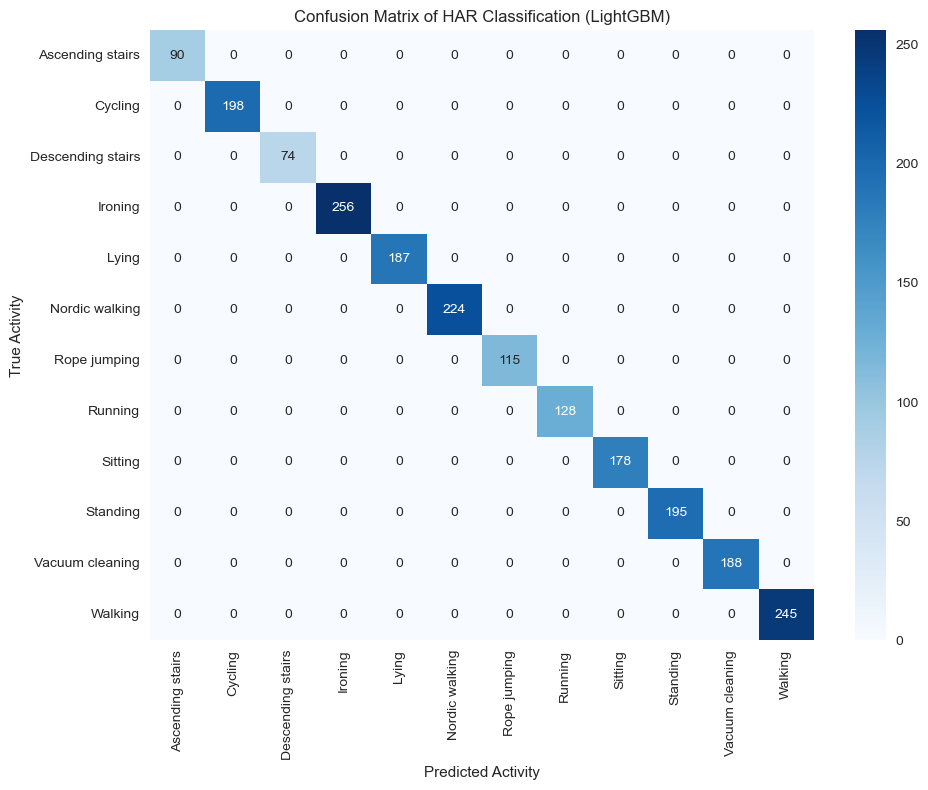

In [92]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_enc, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=le.classes_,
    yticklabels=le.classes_
)

plt.xlabel("Predicted Activity")
plt.ylabel("True Activity")
plt.title("Confusion Matrix of HAR Classification (LightGBM)")
plt.tight_layout()
plt.show()


C:\Users\souga\AppData\Local\Temp\ipykernel_39104\1736835713.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


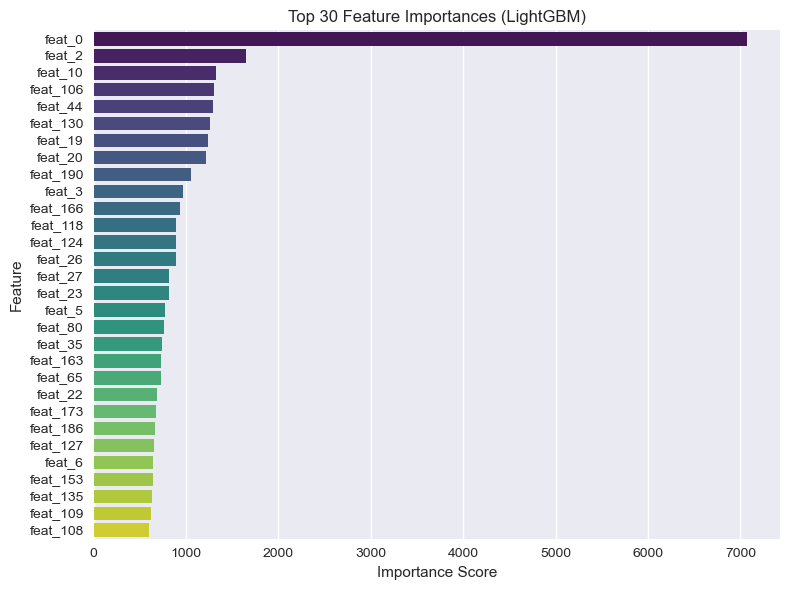

In [90]:
import pandas as pd
import numpy as np

importance = lgb_model.feature_importances_

feature_names = X_train_feat.columns if hasattr(X_train_feat, "columns") else [
    f"feat_{i}" for i in range(len(importance))
]

fi_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importance
}).sort_values(by="importance", ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(
    x="importance",
    y="feature",
    data=fi_df.head(30),
    palette="viridis"
)

plt.title("Top 30 Feature Importances (LightGBM)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
